# Neural Network

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
data.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

In [5]:
# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer,
                                    output_layer])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
%%time
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8352 - loss: 0.3676 - val_accuracy: 0.7762 - val_loss: 0.5142
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8487 - loss: 0.3484 - val_accuracy: 0.7832 - val_loss: 0.5149
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8606 - loss: 0.3429 - val_accuracy: 0.7762 - val_loss: 0.5147
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8472 - loss: 0.3433 - val_accuracy: 0.7762 - val_loss: 0.5161
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8362 - loss: 0.3643 - val_accuracy: 0.7832 - val_loss: 0.5182
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.3681 - val_accuracy: 0.7762 - val_loss: 0.5162
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8387 - loss: 0.3826 - val_accuracy: 0.7762 - val_loss: 0.5179
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8770 - loss: 0.3132 - val_accuracy: 0.7832 - v

In [12]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.5138 
Test Accuracy: 0.7762237787246704
Test Loss: 0.5398887395858765


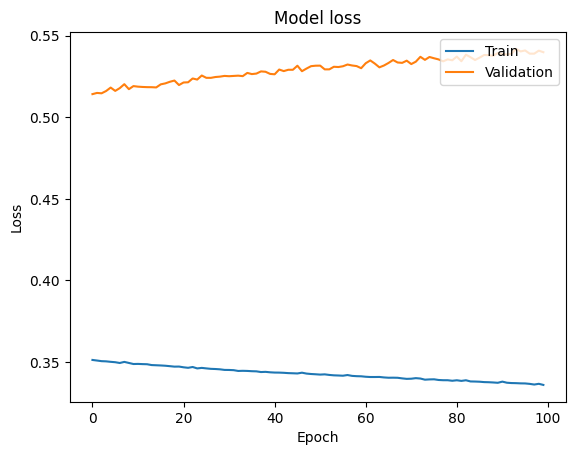

In [14]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()